# Preprocessing

In [1]:
library(tidyverse)
library(glue)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse




In [108]:
base_size = 25
title_size = 35
facet_size = 15
geom_text_size=7
library(ggplot2); 
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0.5), 
                #axis.title.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank(), 
                strip.text.x = element_text(size = facet_size), axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2))) 

In [2]:
dataset_name = "210212_cvd_gp"
path = "/data/analysis/ag-reils/steinfej/code/umbrella/pre/ukbb"
data_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS/data"
dataset_path = glue("{data_path}/2_datasets_pre/{dataset_name}")

In [133]:
basics = arrow::read_feather(glue("{dataset_path}/temp_basics.feather"))
measurements = arrow::read_feather(glue("{dataset_path}/temp_measurements.feather"))
labs = arrow::read_feather(glue("{dataset_path}/temp_labs.feather"))
data = basics %>% left_join(measurements, on="eid") %>% left_join(labs, on="eid")

Joining, by = "eid"

Joining, by = "eid"



In [151]:
colnames(data)

[1] "eid"                                                             
 [2] "age_at_recruitment_f21022_0_0"                                   
 [3] "sex_f31_0_0"                                                     
 [4] "ethnic_background_f21000_0_0"                                    
 [5] "townsend_deprivation_index_at_recruitment_f189_0_0"              
 [6] "date_of_attending_assessment_centre_f53_0_0"                     
 [7] "uk_biobank_assessment_centre_f54_0_0"                            
 [8] "birth_date"                                                      
 [9] "body_mass_index_bmi_f21001_0_0"                                  
[10] "weight_f21002_0_0"                                               
[11] "pulse_wave_arterial_stiffness_index_f21021_0_0"                  
[12] "pulse_wave_reflection_index_f4195_0_0"                           
[13] "waist_circumference_f48_0_0"                                     
[14] "hip_circumference_f49_0_0"                                       
[15] "standing_height_f50_0_0"                                         
[16] "trunk_fat_percentage_f23127_0_0"                                 
[17] "body_fat_percentage_f23099_0_0"                                  
[18] "basal_metabolic_rate_f23105_0_0"                                 
[19] "forced_vital_capacity_fvc_best_measure_f20151_0_0"               
[20] "forced_expiratory_volume_in_1second_fev1_best_measure_f20150_0_0"
[21] "fev1_fvc_ratio_zscore_f20258_0_0"                                
[22] "peak_expiratory_flow_pef_f3064_0_2"                              
[23] "peak_expiratory_flow_pef_f3064_0_1"                              
[24] "peak_expiratory_flow_pef_f3064_0_0"                              
[25] "systolic_blood_pressure_automated_reading_f4080"                 
[26] "diastolic_blood_pressure_automated_reading_f4079"                
[27] "pulse_rate_automated_reading_f102"                               
[28] "basophill_count_f30160_0_0"                                      
[29] "basophill_percentage_f30220_0_0"                                 
[30] "eosinophill_count_f30150_0_0"                                    
[31] "eosinophill_percentage_f30210_0_0"                               
[32] "haematocrit_percentage_f30030_0_0"                               
[33] "haemoglobin_concentration_f30020_0_0"                            
[34] "high_light_scatter_reticulocyte_count_f30300_0_0"                
[35] "high_light_scatter_reticulocyte_percentage_f30290_0_0"           
[36] "immature_reticulocyte_fraction_f30280_0_0"                       
[37] "lymphocyte_count_f30120_0_0"                                     
[38] "lymphocyte_percentage_f30180_0_0"                                
[39] "mean_corpuscular_haemoglobin_f30050_0_0"                         
[40] "mean_corpuscular_haemoglobin_concentration_f30060_0_0"           
[41] "mean_corpuscular_volume_f30040_0_0"                              
[42] "mean_platelet_thrombocyte_volume_f30100_0_0"                     
[43] "mean_reticulocyte_volume_f30260_0_0"                             
[44] "mean_sphered_cell_volume_f30270_0_0"                             
[45] "monocyte_count_f30130_0_0"                                       
[46] "monocyte_percentage_f30190_0_0"                                  
[47] "neutrophill_count_f30140_0_0"                                    
[48] "neutrophill_percentage_f30200_0_0"                               
[49] "nucleated_red_blood_cell_count_f30170_0_0"                       
[50] "nucleated_red_blood_cell_percentage_f30230_0_0"                  
[51] "platelet_count_f30080_0_0"                                       
[52] "platelet_crit_f30090_0_0"                                        
[53] "platelet_distribution_width_f30110_0_0"                          
[54] "red_blood_cell_erythrocyte_count_f30010_0_0"                     
[55] "red_blood_cell_erythrocyte_distribution_width_f30070_0_0"        
[56] "reticulocyte_count_f30250_0_0"     

In [147]:
data_long = data %>% pivot_longer(all_of(colnames(data)[9:88]), names_to="column", values_to="value")

In [163]:
data_mean = data_long %>% 
    #filter(column %in% c("weight_f21002_0_0", 'systolic_blood_pressure_automated_reading_f4080', "diastolic_blood_pressure_automated_reading_f4079", 'cholesterol_f30690_0_0',
     #                  "hdl_cholesterol_f30760_0_0", 'ldl_direct_f30780_0_0', "triglycerides_f30870_0_0"))
    mutate(name = case_when(column == "weight_f21002_0_0" ~ "O/E - weight",
                            column == 'systolic_blood_pressure_automated_reading_f4080' ~ "O/E - Systolic BP reading",
                            column == "diastolic_blood_pressure_automated_reading_f4079" ~ "O/E - Dystolic BP reading",
                            column == "cholesterol_f30690_0_0" ~ "Serum cholesterol level",
                            column == "triglycerides_f30870_0_0" ~ "Serum triglycerides level",
                            column == "hdl_cholesterol_f30760_0_0" ~ "Serum high density lipoprotein cholesterol level",
                            column == 'ldl_direct_f30780_0_0' ~ "Serum low density lipoprotein cholesterol level",
                            TRUE ~ ""),
           meaning = case_when(column == "weight_f21002_0_0" ~ "162763007",
                               column == 'systolic_blood_pressure_automated_reading_f4080' ~ "163030003",
                               column == "diastolic_blood_pressure_automated_reading_f4079" ~ "163031004",
                               column == "cholesterol_f30690_0_0" ~ "1005671000000105",
                               column == "triglycerides_f30870_0_0" ~ "1005691000000109",
                               column == "hdl_cholesterol_f30760_0_0" ~ "1005681000000107",
                               column == 'ldl_direct_f30780_0_0' ~ "1022191000000100",
                               TRUE ~ "")) %>% mutate(date = date_of_attending_assessment_centre_f53_0_0) %>% select(eid, name, meaning, date, value)
head(data_mean)

eid,name,meaning,date,value
<int>,<chr>,<chr>,<date>,<dbl>
1000018,,,2009-11-12,26.5557
1000018,O/E - weight,162763007,2009-11-12,63.8000
1000018,,,2009-11-12,7.2770
1000018,,,2009-11-12,80.0000
1000018,,,2009-11-12,85.0000
1000018,,,2009-11-12,107.0000


In [5]:
gp_measurements = arrow::read_feather(glue("{data_path}/1_decoded/codes_gp_measurements_210120.feather"))

In [22]:
gp_eids = (gp_measurements %>% select(eid) %>% distinct())$eid

In [169]:
n=10
eids = (data %>% select(eid) %>% filter(eid %in% gp_eids) %>% distinct() %>% sample_n(n))$eid

Joining, by = "eid"

`geom_smooth()` using formula 'y ~ x'

Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in qt((1 - level)/2, df):
"NaNs produced"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments 

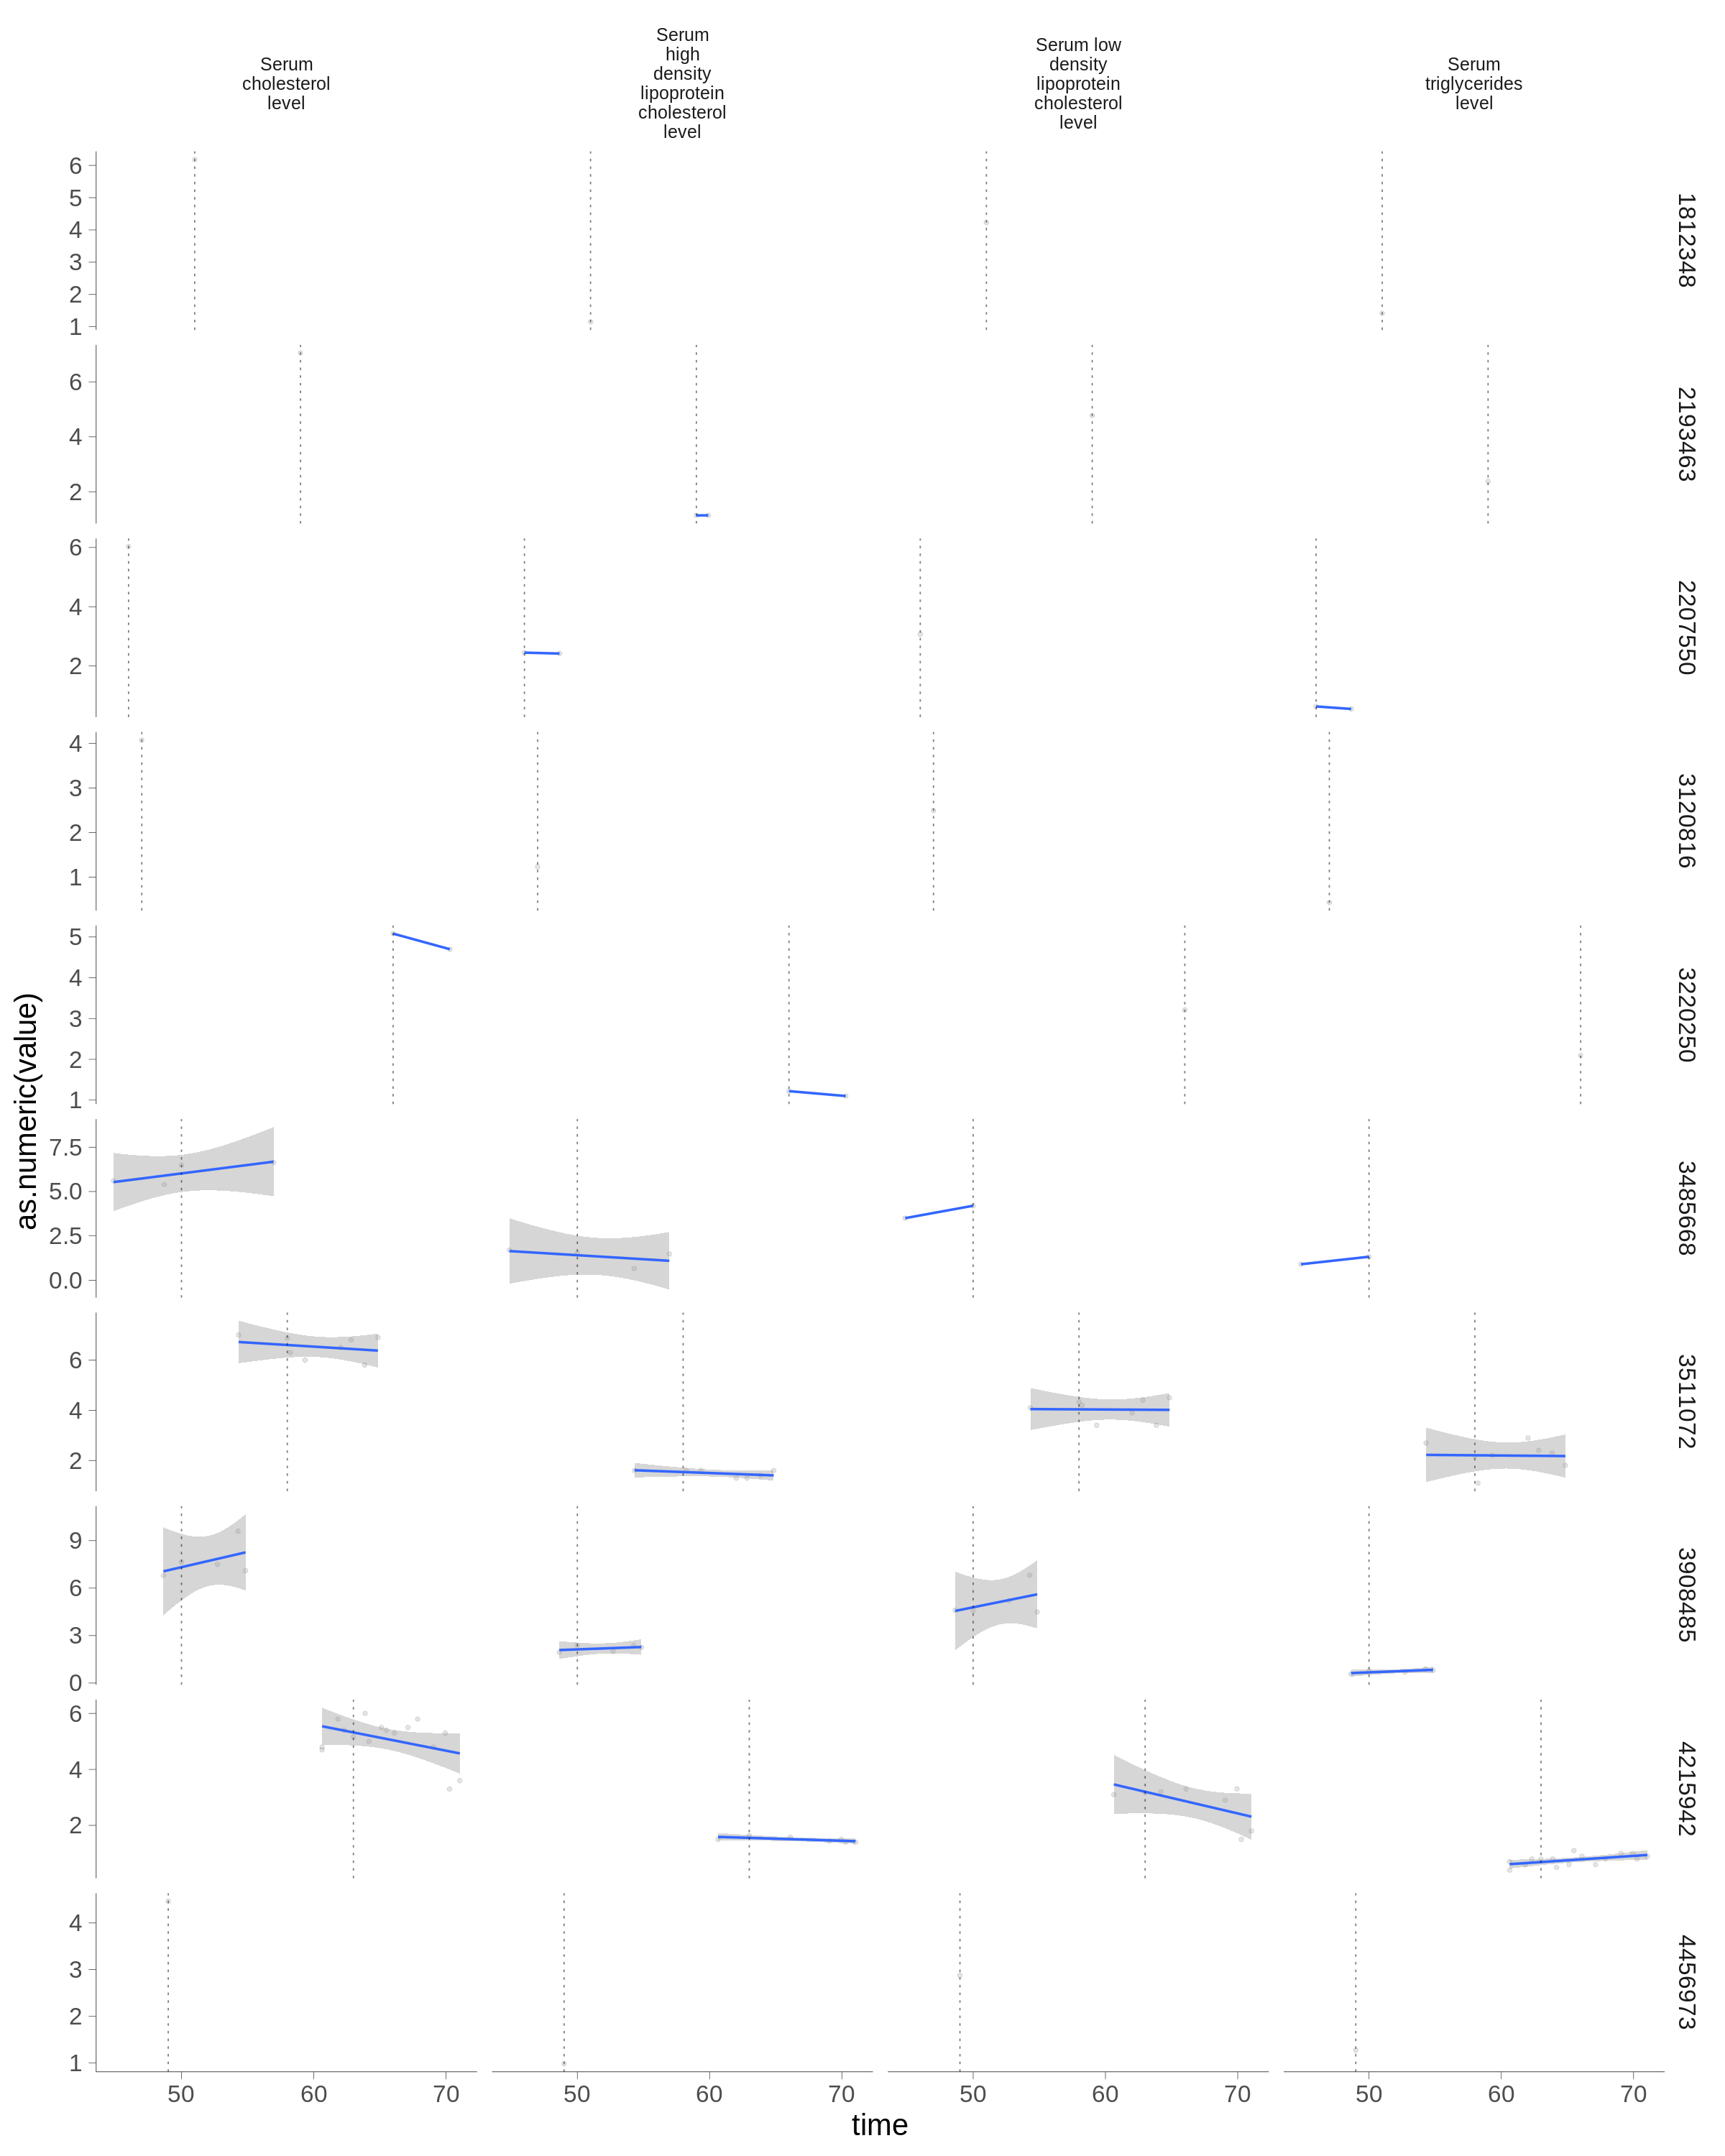

In [171]:
options(repr.plot.width=20, repr.plot.height=25)
library(lubridate)
df = rbind(gp_measurements %>% select(eid, date, meaning, name, value), data_mean) %>% 
    filter(eid %in% eids) %>% 
    filter(name %in% c(#"O/E - Systolic BP reading", "O/E - Diastolic BP reading", 
                       #"O/E - weight", 
                        "Serum cholesterol level", "Serum triglycerides level",
                       "Serum high density lipoprotein cholesterol level", "Serum low density lipoprotein cholesterol level")) %>%
    filter(as.numeric(value)>0) %>% 
    filter(!((name=="Haemoglobin estimation")&(value> 50))) %>%
    filter(!((name=="O/E - Diastolic BP reading")&(value> 400))) %>%
    filter(!((name=="O/E - Systolic BP reading")&(value> 400))) %>%
    filter(!((name=="O/E - weight")&(value> 300))) %>%
    filter(!((name=="Serum cholesterol level")&(value> 20))) %>%
    filter(!((name=="Serum creatinine level")&(value> 1000))) %>%
    filter(!((name=="Serum high density lipoprotein cholesterol level")&(value> 100))) %>%
    #filter(!((name=="Finding of body mass index")&(value> 50))) %>%
    left_join(data, on="eid") %>% mutate(time = time_length(difftime(date, birth_date), "years"))%>% filter(time>0)

ggplot(df, aes(x=time, y=as.numeric(value)), color=as.factor(name))+geom_point(alpha=0.1)+
    facet_grid(eid~name, scales="free", labeller=label_wrap_gen(width = 10, multi_line = TRUE))+
    geom_smooth(method="lm")+
    geom_vline(aes(xintercept=age_at_recruitment_f21022_0_0), linetype="24", alpha=0.5)

In [135]:
df

eid,date,code,value1,value2,value3,meaning,name,value,age_at_recruitment_f21022_0_0,⋯,rheumatoid_factor_f30820_0_0,shbg_f30830_0_0,testosterone_f30850_0_0,total_bilirubin_f30840_0_0,total_protein_f30860_0_0,triglycerides_f30870_0_0,urate_f30880_0_0,urea_f30670_0_0,vitamin_d_f30890_0_0,time
<int>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1659367,2009-11-30,22A..,83.000,NA,NA,162763007,O/E - weight,83.00,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,42.24504
1659367,2009-12-21,22A..,86.000,NA,NA,162763007,O/E - weight,86.00,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,42.30253
1659367,2015-08-27,22A..,96.000,NA,NA,162763007,O/E - weight,96.00,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,47.98357
1659367,2015-08-27,2469.,122.000,NA,NA,163030003,O/E - Systolic BP reading,122.00,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,47.98357
1659367,2015-08-27,2469.,135.000,NA,NA,163030003,O/E - Systolic BP reading,135.00,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,47.98357
1659367,2015-08-27,246A.,77.000,NA,NA,163031004,O/E - Diastolic BP reading,77.00,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,47.98357
1659367,2015-08-27,246A.,79.000,NA,NA,163031004,O/E - Diastolic BP reading,79.00,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,47.98357
1659367,2015-08-27,44P5.,1.100,NA,NA,1005681000000107,Serum high density lipoprotein cholesterol level,1.10,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,47.98357
1659367,2015-08-27,XE2eD,5.200,NA,NA,1005671000000105,Serum cholesterol level,5.20,42,⋯,NA,NA,11.148,8.89,NA,1.332,276.2,3.72,43.2,47.98357


In [ ]:
options(repr.plot.width=20, repr.plot.height=25)
library(lubridate)
df = gp_measurements %>% filter(eid %in% eids) %>% filter(name %in% c("O/E - Systolic BP reading", "O/E - Diastolic BP reading", 
                                                                      "Serum creatinine level", "Haemoglobin estimation",
                                                                      "GFR (glomerular filtration rate) calculated by abbreviated Modification of Diet in Renal Disease Study Group calculation", "Serum glucose level", 	
                                                                      "Total white cell count", "O/E - weight", "Serum cholesterol level", 
                                                                      "Serum high density lipoprotein cholesterol level", "Serum low density lipoprotein cholesterol level",
                                                                      "Serum triglycerides level")) %>%
    filter(as.numeric(value1)>0) %>% 
    filter(!((name=="Haemoglobin estimation")&(value> 50))) %>%
    filter(!((name=="O/E - Diastolic BP reading")&(value> 400))) %>%
    filter(!((name=="O/E - Systolic BP reading")&(value> 400))) %>%
    filter(!((name=="O/E - weight")&(value> 300))) %>%
    filter(!((name=="Serum cholesterol level")&(value> 20))) %>%
    filter(!((name=="Serum creatinine level")&(value> 1000))) %>%
    filter(!((name=="Serum high density lipoprotein cholesterol level")&(value> 100))) %>%
    #filter(!((name=="Finding of body mass index")&(value> 50))) %>%
    left_join(data, on="eid") %>% mutate(time = time_length(difftime(date, birth_date), "years"))%>% filter(time>0)

ggplot(df, aes(x=time, y=as.numeric(value)), color=as.factor(name))+geom_point(alpha=0.1)+
    facet_grid(eid~name, scales="free_y", labeller=label_wrap_gen(width = 10, multi_line = TRUE))+
    geom_smooth(method="lm")#+
    #geom_vline(aes(xintercept=age_at_recruitment_f21022_0_0))

In [94]:
gp_measurements %>% count(name, sort=TRUE)

name,n
<chr>,<int>
O/E - Diastolic BP reading,4142442
O/E - Systolic BP reading,3963088
Serum creatinine level,1670214
Haemoglobin estimation,1662102
Total white cell count,1630899
O/E - weight,1588105
Serum sodium level,1587227
Serum potassium level,1582109
Finding of body mass index,1371580


In [79]:
library(lubridate)
df

eid,date,code,value1,value2,value3,meaning,name,value,age_at_recruitment_f21022_0_0,sex_f31_0_0,ethnic_background_f21000_0_0,townsend_deprivation_index_at_recruitment_f189_0_0,date_of_attending_assessment_centre_f53_0_0,uk_biobank_assessment_centre_f54_0_0,birth_date,time
<int>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<date>,<chr>,<date>,<dbl>
1005194,1993-06-30,246..,120.000,80.000,NA,163030003,O/E - Systolic BP reading,120,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,48.68446
1005194,1993-06-30,246..,120.000,80.000,NA,163031004,O/E - Diastolic BP reading,80,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,48.68446
1005194,1997-07-14,246..,130.000,80.000,NA,163030003,O/E - Systolic BP reading,130,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,52.72279
1005194,1997-07-14,246..,130.000,80.000,NA,163031004,O/E - Diastolic BP reading,80,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,52.72279
1005194,1999-01-21,246..,142.000,94.000,NA,163030003,O/E - Systolic BP reading,142,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,54.24504
1005194,1999-01-21,246..,142.000,94.000,NA,163031004,O/E - Diastolic BP reading,94,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,54.24504
1005194,1999-01-27,246..,142.000,92.000,NA,163030003,O/E - Systolic BP reading,142,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,54.26146
1005194,1999-01-27,246..,142.000,92.000,NA,163031004,O/E - Diastolic BP reading,92,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,54.26146
1005194,1999-10-06,246..,140.000,86.000,NA,163030003,O/E - Systolic BP reading,140,65,Male,White,1.80551,2009-10-23,Sheffield,1944-10-23,54.95140


In [11]:
codes_gp_measurements.meaning.value_counts(normalize=True)

163031004           4142442
163030003           3963088
1000731000000107    1670214
1022431000000105    1662102
1022541000000102    1630899
                     ...   
173842008                 1
77329001                  1
265404007                 1
81977006                  1
211427006                 1
Name: meaning, Length: 16366, dtype: int64

### Basics

In [19]:
coding10 = pd.read_csv(f"{path}/mapping/codings/coding10.tsv", sep="\t").assign(coding = lambda x: x.coding.astype("int")).rename(columns={"coding":"uk_biobank_assessment_centre_f54_0_0"})
coding10["uk_biobank_assessment_centre_f54_0_0"] = coding10["uk_biobank_assessment_centre_f54_0_0"].astype("int")

In [24]:
fields_basics = [
    "21022", # age at recruitment
    "31", # sex
    "21000", # ethnicity
    "189", # Townsend index
    "53", # date of baseline assessment
    "54", # assessment center
]

temp = get_data_fields(fields_basics, data, data_field)

temp["sex_f31_0_0"] = temp["sex_f31_0_0"].cat.set_categories(["Female", 'Male'], ordered=False)

#temp["ethnic_background_f21000_0_0"] = temp["ethnic_background_f21000_0_0"].astype("string")

ethn_bg_def = {"White": ["White", "British", "Irish", "Any other white background"],
                "Mixed": ["Mixed", "White and Black Caribbean", "White and Black African", "White and Asian", "Any other mixed background"],  
                "Asian": ["Asian or Asian British", "Indian", "Pakistani", "Bangladeshi", "Any other Asian background"], 
                "Black": ["Black or Black British", "Caribbean", "African", "Any other Black background"],
                "Chinese": ["Chinese"],  
                np.nan: ["Other ethnic group", "Do not know", "Prefer not to answer"]}

ethn_bg_dict = {}
for key, values in ethn_bg_def.items(): 
    for value in values:
        ethn_bg_dict[value]=key 
        
temp["ethnic_background_f21000_0_0"].replace(ethn_bg_dict, inplace=True)
temp["ethnic_background_f21000_0_0"] = temp["ethnic_background_f21000_0_0"].astype("category")

#
#temp["ethnic_background_f21000_0_0"] = temp["ethnic_background_f21000_0_0"].astype("category").cat.set_categories(['White', 'Black', 'Asien', 'Mixed', 'Chinese'], ordered=False)

basics = temp
print(len(temp))

from dateutil.relativedelta import relativedelta
calc_birth_date = [date_of_attending_assessment_centre - relativedelta(years=age_at_recruitment) 
                                                             for date_of_attending_assessment_centre, age_at_recruitment 
                                                             in zip(basics["date_of_attending_assessment_centre_f53_0_0"], basics["age_at_recruitment_f21022_0_0"])]

basics = basics.assign(birth_date = calc_birth_date)
basics["uk_biobank_assessment_centre_f54_0_0"] = basics.assign(uk_biobank_assessment_centre_f54_0_0 = lambda x: x.uk_biobank_assessment_centre_f54_0_0.astype("int")).merge(coding10, on="uk_biobank_assessment_centre_f54_0_0")["meaning"]


display(basics.head())
basics.to_feather(os.path.join(path, dataset_path, 'temp_basics.feather'))

502504


,eid,age_at_recruitment_f21022_0_0,sex_f31_0_0,ethnic_background_f21000_0_0,townsend_deprivation_index_at_recruitment_f189_0_0,date_of_attending_assessment_centre_f53_0_0,uk_biobank_assessment_centre_f54_0_0,birth_date
0,1000018,49.0,Female,White,-1.852930,2009-11-12,Sheffield,1960-11-12
1,1000020,59.0,Male,White,0.204248,2008-02-19,Sheffield,1949-02-19
2,1000037,59.0,Female,White,-3.498860,2008-11-11,Sheffield,1949-11-11
3,1000043,63.0,Male,White,-5.351150,2009-06-03,Sheffield,1946-06-03
4,1000051,51.0,Female,White,-1.799080,2006-06-10,Sheffield,1955-06-10


In [8]:
 print(temp["ethnic_background_f21000_0_0"].unique())

['White', 'Black', NaN, 'Asian', 'Mixed', 'Chinese']
Categories (5, object): ['White', 'Black', 'Asian', 'Mixed', 'Chinese']


### Questionnaire

In [25]:
fields_questionnaire = [
    "2178", # Overall health
    "20116", # Smoking status
    "1558",
]

temp = get_data_fields(fields_questionnaire, data, data_field)

temp["overall_health_rating_f2178_0_0"] = temp["overall_health_rating_f2178_0_0"]\
    .replace({"Do not know": np.nan, "Prefer not to answer": np.nan})\
    .astype("category").cat.set_categories(['Poor', 'Fair', 'Good', 'Excellent'], ordered=True)


temp["smoking_status_f20116_0_0"] = temp["smoking_status_f20116_0_0"]\
    .replace({"Prefer not to answer": np.nan}, inplace=False)\
    .astype("category").cat.set_categories(['Current', 'Previous', 'Never'], ordered=True)

temp["alcohol_intake_frequency_f1558_0_0"] = temp["alcohol_intake_frequency_f1558_0_0"]\
    .replace({"Prefer not to answer": np.nan}, inplace=False)\
    .astype("category").cat.set_categories([
        'Daily or almost daily', 
        'Three or four times a week', 
        'Once or twice a week',
        'One to three times a month',
        'Special occasions only', 
        'Never'], ordered=True)

questionnaire = temp
print(len(temp))
display(temp.head())

questionnaire.to_feather(os.path.join(path, dataset_path, 'temp_questionnaire.feather'))

502504


,eid,overall_health_rating_f2178_0_0,smoking_status_f20116_0_0,alcohol_intake_frequency_f1558_0_0
0,1000018,Fair,Current,Once or twice a week
1,1000020,Good,Current,Once or twice a week
2,1000037,Good,Previous,Once or twice a week
3,1000043,Fair,Previous,Three or four times a week
4,1000051,Poor,Never,One to three times a month


In [26]:
print(temp["alcohol_intake_frequency_f1558_0_0"].unique())

['Once or twice a week', 'Three or four times a week', 'One to three times a month', 'Daily or almost daily', 'Special occasions only', 'Never', NaN]
Categories (6, object): ['Daily or almost daily' < 'Three or four times a week' < 'Once or twice a week' < 'One to three times a month' < 'Special occasions only' < 'Never']


### Physical measurements

In [27]:
from statistics import mean

fields_measurements = [
#    "100313", # Walking speed !!! MISSING !!!
    "21001", # BMI
    "21002", # weight
    "4080", # Syst. BP
    "4079", # Diast. BP
    "102",
    "21021",
    "4195",
    "48",
    "49",
    "50",
    "23127",
    "23099",
    "23105",
    "20151",
    "20150",
    "20258",
    "3064",
    
]
temp = get_data_fields(fields_measurements, data, data_field)

sbp_cols = ["systolic_blood_pressure_automated_reading_f4080_0_0", "systolic_blood_pressure_automated_reading_f4080_0_1"]
dbp_cols = ["diastolic_blood_pressure_automated_reading_f4079_0_0", "diastolic_blood_pressure_automated_reading_f4079_0_1"]
pr_cols = ["pulse_rate_automated_reading_f102_0_0", "pulse_rate_automated_reading_f102_0_1"]

temp = temp.assign(systolic_blood_pressure_automated_reading_f4080 = temp[sbp_cols].mean(axis=1),
                   diastolic_blood_pressure_automated_reading_f4079 = temp[dbp_cols].mean(axis=1),
                   pulse_rate_automated_reading_f102 = temp[pr_cols].mean(axis=1))\
    .drop(sbp_cols + dbp_cols + pr_cols, axis=1)

measurements = temp
print(len(temp))
display(temp.head())

measurements.to_feather(os.path.join(path, dataset_path, 'temp_measurements.feather'))

502504


,eid,body_mass_index_bmi_f21001_0_0,weight_f21002_0_0,pulse_wave_arterial_stiffness_index_f21021_0_0,pulse_wave_reflection_index_f4195_0_0,waist_circumference_f48_0_0,hip_circumference_f49_0_0,standing_height_f50_0_0,trunk_fat_percentage_f23127_0_0,body_fat_percentage_f23099_0_0,basal_metabolic_rate_f23105_0_0,forced_vital_capacity_fvc_best_measure_f20151_0_0,forced_expiratory_volume_in_1second_fev1_best_measure_f20150_0_0,fev1_fvc_ratio_zscore_f20258_0_0,peak_expiratory_flow_pef_f3064_0_2,peak_expiratory_flow_pef_f3064_0_1,peak_expiratory_flow_pef_f3064_0_0,systolic_blood_pressure_automated_reading_f4080,diastolic_blood_pressure_automated_reading_f4079,pulse_rate_automated_reading_f102
0,1000018,26.5557,63.8,7.2770,80.0,85.0,107.0,155.0,37.5,39.5,5012.0,3.21,2.16,1.978,317.0,312.0,339.0,159.5,88.0,50.0
1,1000020,22.7465,70.7,NaN,NaN,87.8,94.4,176.3,33.4,28.7,6171.0,NaN,NaN,1.375,301.0,496.0,504.0,133.0,81.0,74.0
2,1000037,32.4211,78.9,NaN,NaN,101.0,112.0,156.0,47.5,48.4,5397.0,1.61,1.27,0.138,NaN,185.0,208.0,118.5,78.0,62.5
3,1000043,29.5679,95.8,11.1111,78.0,98.0,104.0,180.0,27.6,25.6,8711.0,4.14,2.84,1.096,557.0,513.0,530.0,141.5,93.5,64.5
4,1000051,41.0222,92.3,NaN,NaN,123.0,129.0,150.0,48.9,50.4,6100.0,NaN,NaN,0.518,NaN,NaN,NaN,117.0,81.0,79.0


### Lab measurements

In [28]:
fields_blood_count = [
    "30160", #	Basophill count
    "30220", #	Basophill percentage
    "30150", #	Eosinophill count
    "30210", #	Eosinophill percentage
    "30030", #	Haematocrit percentage
    "30020", #	Haemoglobin concentration
    "30300", #	High light scatter reticulocyte count
    "30290", #	High light scatter reticulocyte percentage
    "30280", #	Immature reticulocyte fraction
    "30120", #	Lymphocyte count
    "30180", #	Lymphocyte percentage
    "30050", #	Mean corpuscular haemoglobin
    "30060", #	Mean corpuscular haemoglobin concentration
    "30040", #	Mean corpuscular volume
    "30100", #	Mean platelet (thrombocyte) volume
    "30260", #	Mean reticulocyte volume
    "30270", #	Mean sphered cell volume
    "30130", #	Monocyte count
    "30190", #	Monocyte percentage
    "30140", #	Neutrophill count
    "30200", #	Neutrophill percentage
    "30170", #	Nucleated red blood cell count
    "30230", #	Nucleated red blood cell percentage
    "30080", #	Platelet count
    "30090", #	Platelet crit
    "30110", #	Platelet distribution width
    "30010", #	Red blood cell (erythrocyte) count
    "30070", #	Red blood cell (erythrocyte) distribution width
    "30250", #	Reticulocyte count
    "30240", #	Reticulocyte percentage
    "30000", #	White blood cell (leukocyte) count
]

fields_blood_biochemistry = [
    "30620",#	Alanine aminotransferase
    "30600",#	Albumin
    "30610",#	Alkaline phosphatase
    "30630",#	Apolipoprotein A
    "30640",#	Apolipoprotein B
    "30650",#	Aspartate aminotransferase
    "30710",#	C-reactive protein
    "30680",#	Calcium
    "30690",#	Cholesterol
    "30700",#	Creatinine
    "30720",#	Cystatin C
    "30660",#	Direct bilirubin
    "30730",#	Gamma glutamyltransferase
    "30740",#	Glucose
    "30750",#	Glycated haemoglobin (HbA1c)
    "30760",#	HDL cholesterol
    "30770",#	IGF-1
    "30780",#	LDL direct
    "30790",#	Lipoprotein A
    "30800",#	Oestradiol
    "30810",#	Phosphate
    "30820",#	Rheumatoid factor
    "30830",#	SHBG
    "30850",#	Testosterone
    "30840",#	Total bilirubin
    "30860",#	Total protein
    "30870",#	Triglycerides
    "30880",#	Urate
    "30670",#	Urea
    "30890",#	Vitamin D
]

fields_blood_infectious = [
    "23000", #	1gG antigen for Herpes Simplex virus-1
    "23001", #	2mgG unique antigen for Herpes Simplex virus-2
    "23049", #	Antigen assay QC indicator
    "23048", #	Antigen assay date
    "23026", #	BK VP1 antigen for Human Polyomavirus BKV
    "23039", #	CagA antigen for Helicobacter pylori
    "23043", #	Catalase antigen for Helicobacter pylori
    "23018", #	Core antigen for Hepatitis C Virus
    "23030", #	E6 antigen for Human Papillomavirus type-16
    "23031", #	E7 antigen for Human Papillomavirus type-16
    "23006", #	EA-D antigen for Epstein-Barr Virus
    "23004", #	EBNA-1 antigen for Epstein-Barr Virus
    "23042", #	GroEL antigen for Helicobacter pylori
    "23016", #	HBc antigen for Hepatitis B Virus
    "23017", #	HBe antigen for Hepatitis B Virus
    "23025", #	HIV-1 env antigen for Human Immunodeficiency Virus
    "23024", #	HIV-1 gag antigen for Human Immunodeficiency Virus
    "23023", #	HTLV-1 env antigen for Human T-Lymphotropic Virus 1
    "23022", #	HTLV-1 gag antigen for Human T-Lymphotropic Virus 1
    "23010", #	IE1A antigen for Human Herpesvirus-6
    "23011", #	IE1B antigen for Human Herpesvirus-6
    "23027", #	JC VP1 antigen for Human Polyomavirus JCV
    "23015", #	K8.1 antigen for Kaposi's Sarcoma-Associated Herpesvirus
    "23029", #	L1 antigen for Human Papillomavirus type-16
    "23032", #	L1 antigen for Human Papillomavirus type-18
    "23014", #	LANA antigen for Kaposi's Sarcoma-Associated Herpesvirus
    "23028", #	MC VP1 antigen for Merkel Cell Polyomavirus
    "23019", #	NS3 antigen for Hepatitis C Virus
    "23041", #	OMP antigen for Helicobacter pylori
    "23037", #	PorB antigen for Chlamydia trachomatis
    "23013", #	U14 antigen for Human Herpesvirus-7
    "23044", #	UreA antigen for Helicobacter pylori
    "23003", #	VCA p18 antigen for Epstein-Barr Virus
    "23040", #	VacA antigen for Helicobacter pylori
    "23005", #	ZEBRA antigen for Epstein-Barr Virus
    "23002", #	gE / gI antigen for Varicella Zoster Virus
    "23034", #	momp A antigen for Chlamydia trachomatis
    "23033", #	momp D antigen for Chlamydia trachomatis
    "23012", #	p101 k antigen for Human Herpesvirus-6
    "23020", #	p22 antigen for Toxoplasma gondii
    "23038", #	pGP3 antigen for Chlamydia trachomatis
    "23009", #	pp 28 antigen for Human Cytomegalovirus
    "23008", #	pp 52 antigen for Human Cytomegalovirus
    "23007", #	pp150 Nter antigen for Human Cytomegalovirus
    "23021", #	sag1 antigen for Toxoplasma gondii
    "23035", #	tarp-D F1 antigen for Chlamydia trachomatis
    "23036", #	tarp-D F2 antigen for Chlamydia trachomatis
]

labs = temp = get_data_fields(fields_blood_count+fields_blood_biochemistry+fields_blood_infectious, data, data_field)
print(len(temp))
display(temp.head())

labs.to_feather(os.path.join(path, dataset_path, 'temp_labs.feather'))

502504


,eid,basophill_count_f30160_0_0,basophill_percentage_f30220_0_0,eosinophill_count_f30150_0_0,eosinophill_percentage_f30210_0_0,haematocrit_percentage_f30030_0_0,haemoglobin_concentration_f30020_0_0,high_light_scatter_reticulocyte_count_f30300_0_0,high_light_scatter_reticulocyte_percentage_f30290_0_0,immature_reticulocyte_fraction_f30280_0_0,...,phosphate_f30810_0_0,rheumatoid_factor_f30820_0_0,shbg_f30830_0_0,testosterone_f30850_0_0,total_bilirubin_f30840_0_0,total_protein_f30860_0_0,triglycerides_f30870_0_0,urate_f30880_0_0,urea_f30670_0_0,vitamin_d_f30890_0_0
0,1000018,0.04,0.26,0.25,1.75,39.79,13.90,0.022,0.464,0.378,...,1.422,NaN,70.11,1.560,7.41,71.97,1.247,221.3,5.48,70.7
1,1000020,0.00,0.30,0.30,2.50,45.00,15.60,0.014,0.290,0.300,...,1.264,NaN,55.31,12.237,8.07,78.45,1.906,374.7,5.28,35.9
2,1000037,0.04,0.57,0.10,1.43,39.48,13.58,0.031,0.686,0.380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000043,0.02,0.32,0.11,1.80,44.31,14.99,0.025,0.508,0.250,...,0.928,NaN,31.63,11.398,8.65,69.70,5.184,322.8,6.67,63.6
4,1000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Family History

In [29]:
fh_list=["Heart disease", "Stroke", "High blood pressure",  "Diabetes", "Lung cancer", "Severe depression", "Parkinson's disease", "Alzheimer's disease/dementia", "Chronic bronchitis/emphysema", "Breast cancer", "Bowel cancer"]
with open(os.path.join(path, dataset_path, 'fh_list.yaml'), 'w') as file: yaml.dump(fh_list, file, default_flow_style=False)

fields_family_history = [
    "20107", # Family history 
    "20110" # Family history
]

raw = get_data_fields(fields_family_history, data, data_field)
temp = pd.melt(raw, id_vars=["eid"], value_vars=raw.drop("eid", axis=1).columns.to_list(), var_name = "field", value_name="family_history").drop("field", axis=1)
temp = temp[temp.family_history.isin(fh_list)].assign(family_history=temp["family_history"].str.lower().replace(" ", "_", regex=True))

temp = temp.drop_duplicates().sort_values("eid").reset_index().drop("index", axis=1).assign(n=True)
temp = pd.pivot_table(temp, index="eid", columns="family_history", values="n", observed=True).add_prefix('fh_')
family_history = temp = data[["eid"]].copy().merge(temp, how="left", on="eid").fillna(False)

print(len(temp))
temp.head()

family_history.to_feather(os.path.join(path, dataset_path, 'temp_family_history.feather'))

502504


## Medications

In [30]:
# https://list.essentialmeds.org/?showRemoved=0
# essential medicines WHO?!

In [31]:
atc_mapping = pd.read_csv(f"{path}/mapping/atc/atc_matched_list.csv")
athena_concepts = pd.read_csv(f"{data_path}/athena_vocabulary/CONCEPT.csv", sep="\t").assign(vocabulary_id = lambda x: x.vocabulary_id.astype("string"), concept_class_id = lambda x: x.concept_class_id.astype("string"))
atc_concepts = athena_concepts[athena_concepts.vocabulary_id=="ATC"]
atc2_concepts = atc_concepts[atc_concepts.concept_class_id=="ATC 2nd"].sort_values("concept_code")
medication_list = dict(zip([x.lower().replace(" ", "_") for x in atc2_concepts.concept_name.to_list()], [[x] for x in atc2_concepts.concept_code.to_list()]))
medication_list_extra = {
    "antihypertensives": ["C02"],
    "statins": ["C10A", "C10B"],
    "ass": ["B01"],
    "atypical_antipsychotics" : ["N05"],
    "glucocorticoids" : ["H02"]                        
}
medication_list.update(medication_list_extra)

with open(os.path.join(path, dataset_path, 'medication_list.yaml'), 'w') as file: yaml.dump(medication_list, file, default_flow_style=False)

In [32]:
def had_medication_before(data, data_field, medications, atc_mapping):
    fields = ["20003"]
    raw = get_data_fields(fields, data, data_field)
    temp = pd.melt(raw, id_vars=["eid"], value_vars=raw.drop("eid", axis=1).columns.to_list(), var_name = "field", value_name="UKBB_code").drop("field", axis=1).drop_duplicates()

    temp.UKBB_code = temp.UKBB_code.astype(str)
    temp = temp[temp.UKBB_code!="None"].copy()
    temp = temp[temp.UKBB_code!="nan"].copy()
    temp.UKBB_code = temp.UKBB_code.astype(int)

    temp_atc = temp.merge(atc_mapping, how="left", on="UKBB_code").sort_values("eid").reset_index(drop=True).dropna(subset=["ATC_code"], axis=0)
    temp_atc.ATC_code = temp_atc.ATC_code.astype("string")
    temp = data[["eid"]].copy()
    for med, med_codes in tqdm(medication_list.items()):
        regex_str = "^"+"|^".join(med_codes)
        df = temp_atc[temp_atc.ATC_code.str.contains(regex_str, case=False)][["eid"]]\
            .drop_duplicates(subset=["eid"])\
            .assign(medication=True)
        temp[med] = temp.merge(df, how="left", on="eid").fillna(False).medication
        
    return temp.sort_values("eid")

In [33]:
medications = had_medication_before(data, data_field, medication_list, atc_mapping)
print(len(medications))
medications.head(10)

medications.to_feather(os.path.join(path, dataset_path, 'temp_medications.feather'))


502504


## Diagnoses and events

In [34]:
vocab_dir = f"{data_path}/athena_vocabulary_covid"
vocab = {
    "concept": pd.read_csv(f"{vocab_dir}/CONCEPT.csv", sep='\t'),
    "domain": pd.read_csv(f"{vocab_dir}/DOMAIN.csv", sep='\t'),
    "class": pd.read_csv(f"{vocab_dir}/CONCEPT_CLASS.csv", sep='\t'),
    "relationship": pd.read_csv(f"{vocab_dir}/RELATIONSHIP.csv", sep='\t'),
    "drug_strength": pd.read_csv(f"{vocab_dir}/DRUG_STRENGTH.csv", sep='\t'),
    "vocabulary": pd.read_csv(f"{vocab_dir}/VOCABULARY.csv", sep='\t'),
    "concept_synonym": pd.read_csv(f"{vocab_dir}/CONCEPT_SYNONYM.csv", sep='\t'),
    "concept_ancestor": pd.read_csv(f"{vocab_dir}/CONCEPT_ANCESTOR.csv", sep='\t'),
    "concept_relationship": pd.read_csv(f"{vocab_dir}/CONCEPT_RELATIONSHIP.csv", sep='\t')                       
}

/data/analysis/ag-reils/ag-reils-shared/deps/miniconda3/envs/pl1.x/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/data/analysis/ag-reils/ag-reils-shared/deps/miniconda3/envs/pl1.x/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Definitions

In [35]:
coding1836 = pd.read_csv(f"{path}/mapping/codings/coding1836.tsv", sep="\t").rename(columns={"coding":"code"})
phecodes = pd.read_csv(f"{path}/mapping/phecodes/phecode_icd10.csv")
def phenotype_children(phecodes, phenotype_list):
    l={}
    phecodes = phecodes.dropna(subset=["Phenotype"], axis=0)
    for ph, ph_names in phenotype_list.items():
        regex = "|".join(ph_names)
        l[ph] = list(phecodes[phecodes.Phenotype.str.contains(regex, case=False)].ICD10.str.replace("\\.", "").str.slice(0, 3).unique())
    return l

In [36]:
snomed_core = pd.read_csv(f"{path}/mapping/snomed_core_list.txt", sep="|")

In [37]:
snomed_core = snomed_core.query("SNOMED_CONCEPT_STATUS == 'Current'").copy()
new = snomed_core.SNOMED_FSN.str.split("(", n=1, expand=True)
snomed_core["snomed_name"] = new[0].str.rstrip(' ')
snomed_core["snomed_type"] = new[1].str.rstrip(')')
snomed_core_data = snomed_core#.query("(snomed_type=='disorder' | snomed_type=='finding') & USAGE>0.01")

In [38]:
snomed_names = snomed_core_data.snomed_name.to_list()
snomed_names = [str(item).lower().strip().replace(" ", "_").replace(";", "").replace(",", "") for item in snomed_names]

In [39]:
phenotype_list_snomed = dict(zip(snomed_names, snomed_core_data.SNOMED_CID.to_list()))
snomed_df = pd.DataFrame.from_dict(phenotype_list_snomed, orient='index').reset_index()
snomed_df.columns = ["diagnosis", "concept_code"]

In [40]:
vocab["concept_ancestor"]

,ancestor_concept_id,descendant_concept_id,min_levels_of_separation,max_levels_of_separation
0,375415,4335743,4,4
1,735979,41070383,3,5
2,529411,43269406,3,3
3,141960,200164,3,6
4,441840,4096781,4,12
...,...,...,...,...
63586490,45893522,35412270,2,2
63586491,45893522,46275678,1,1
63586492,45893522,46275680,2,3
63586493,45893522,46275683,1,2


In [41]:
concept_ids = vocab["concept"].query("(vocabulary_id == 'SNOMED') | (vocabulary_id == 'ICD10CM')")
concept_ids_icd10 = vocab["concept"].query("vocabulary_id == 'ICD10CM'").concept_id.to_list()
vocab_concept_ids = concept_ids.concept_id.to_list()
concept_ancestor = vocab["concept_ancestor"][["ancestor_concept_id", "descendant_concept_id"]].query("ancestor_concept_id == @vocab_concept_ids")

In [42]:
concept_rel = vocab["concept_relationship"][["concept_id_1", "concept_id_2", "relationship_id"]].query("(concept_id_1 == @vocab_concept_ids) & (concept_id_2 == @concept_ids_icd10) & (relationship_id == 'Mapped from')")
concept_mapping = concept_rel.rename(columns={"concept_id_2":"concept_id"}).merge(concept_ids, on="concept_id").query("vocabulary_id == 'ICD10CM'")[["concept_id_1", "concept_code"]].rename(columns={"concept_id_1":"concept_id_desc","concept_code":"icd10"})

In [43]:
df_snomed_concept_id = snomed_df.merge(concept_ids[["concept_code", "concept_id"]], on="concept_code")

In [60]:
#df_desc = df_snomed_concept_id.merge(concept_ancestor.rename(columns={"ancestor_concept_id":"concept_id"})[["concept_id", "descendant_concept_id"]], on="concept_id")
#df_desc = df_desc[["diagnosis", "concept_code", "concept_id", "descendant_concept_id"]].rename(columns={"descendant_concept_id":"concept_id_desc"})
#df_desc_codes = df_desc.merge(concept_ids[["concept_id", "concept_code"]].rename(columns={"concept_id":"concept_id_desc", "concept_code":"concept_codes_desc"}), on="concept_id_desc").drop_duplicates().sort_values("concept_code")
#df_desc_icd = df_desc_codes.merge(concept_mapping, on="concept_id_desc")#.rename(columns={"concept_id":"concept_id_desc", "concept_code":"concept_codes_desc"}))

In [44]:
df_icd = df_snomed_concept_id.merge(concept_mapping.rename(columns={"concept_id_desc":"concept_id"}), on="concept_id")
df_mapped = df_icd[["diagnosis", "concept_code", "icd10"]].drop_duplicates()
df_mapped["icd10"] = df_mapped["icd10"].str.replace(".", "")
df_mapped["meaning"] = [e[:3] for e in df_mapped["icd10"].to_list()]
icd10_codes = dict(df_mapped[["diagnosis", "meaning"]].drop_duplicates().groupby("diagnosis")["meaning"].apply(list).to_dict())#set_index("diagnosis", drop=True).to_dict()["meaning"]#.sort_values("diagnosis")

In [45]:
l10_snomed = {}
for ph in icd10_codes: l10_snomed.update({ph:icd10_codes[ph]})

In [48]:
l10_basic = {
    "myocardial_infarction": ['I21', 'I22', 'I23', 'I24', 'I25'],
    "stroke": ['G45', "I63", "I64"],
    "diabetes1" : ['E10'],
    "diabetes2" : ['E11', 'E12', 'E13', 'E14'],
    "chronic_kidney_disease": ["I12", "N18", "N19"],
    'atrial_fibrillation': ['I47', 'I48'],
    'migraine': ['G43', 'G44'],
    'rheumatoid_arthritis': ['J99', 'M05', 'M06', 'M08', 'M12', 'M13'],
    "systemic_lupus_erythematosus": ['M32'],
    'severe_mental_illness': ['F20', 'F25', 'F30', 'F31', 'F32', 'F33', 'F44'],
    "erectile_dysfunction" : ['F52', 'N48'],  
    "liver_disease":["K70", "K71", "K72", "K73", "K74", "K75", "K76", "K77"],
    "dementia":['F00', 'F01', 'F02', 'F03'],
    "copd": ['J44']
}

In [49]:
l10_basic

{'myocardial_infarction': ['I21', 'I22', 'I23', 'I24', 'I25'],
 'stroke': ['G45', 'I63', 'I64'],
 'diabetes1': ['E10'],
 'diabetes2': ['E11', 'E12', 'E13', 'E14'],
 'chronic_kidney_disease': ['I12', 'N18', 'N19'],
 'atrial_fibrillation': ['I47', 'I48'],
 'migraine': ['G43', 'G44'],
 'rheumatoid_arthritis': ['J99', 'M05', 'M06', 'M08', 'M12', 'M13'],
 'systemic_lupus_erythematosus': ['M32'],
 'severe_mental_illness': ['F20', 'F25', 'F30', 'F31', 'F32', 'F33', 'F44'],
 'erectile_dysfunction': ['F52', 'N48'],
 'liver_disease': ['K70', 'K71', 'K72', 'K73', 'K74', 'K75', 'K76', 'K77'],
 'dementia': ['F00', 'F01', 'F02', 'F03'],
 'copd': ['J44']}

In [50]:
l10_all = l10_basic
for key, value in l10_snomed.items(): 
    if key not in l10_basic: l10_all[key] = value

In [51]:
l10 = {k: v for k, v in l10_all.items() if len(v)!=0}

#phenotype_list = {k: v for k, v in phenotype_list.items() if k in list(l10.keys())}

with open(os.path.join(path, dataset_path, 'phenotype_list.yaml'), 'w') as file: yaml.dump(l10, file, default_flow_style=False)

### 1. Self Reported

In [52]:
coding609 = pd.read_csv(f"{path}/mapping/codings/coding609.tsv", sep="\t").rename(columns={"coding":"code"})

In [53]:
from datetime import datetime, timedelta

def datetime_from_dec_year(dec_year):
    start = dec_year
    year = int(start)
    rem = start - year

    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    #result.strftime("%Y-%m-%d")
    return result.date()

def extract_map_self_reported(data, data_field, code_map):
    pbar = tqdm(total=16)
    ### codes
    fields = ["20002"]; pbar.update(1)
    raw = get_data_fields_all(fields, data, data_field); pbar.update(1)
    col = "noncancer_illness_code_selfreported_f20002"; pbar.update(1)
    temp = pd.wide_to_long(raw, stubnames=[col], i="eid", j="instance_index", sep="_", suffix="\w+").reset_index(); pbar.update(1)
    codes = temp.rename(columns={col:"code"})\
        .assign(code=lambda x: x.code.astype(str))\
        .replace("None", np.nan) \
        .replace("nan", np.nan) \
        .dropna(subset=["code"], axis=0)\
        .assign(code=lambda x: x.code.astype(int)) \
        .merge(code_map, how="left",on="code") \
        .dropna(subset=["meaning"], axis=0)\
        .sort_values(["eid", "instance_index"]) \
        .reset_index(drop=True); pbar.update(1)
    
    ### dates
    fields = ["20008"]; pbar.update(1)
    raw = get_data_fields_all(fields, data, data_field); pbar.update(1)
    col="interpolated_year_when_noncancer_illness_first_diagnosed_f20008"; pbar.update(1)
    temp = pd.wide_to_long(raw, stubnames=[col], i="eid", j="instance_index", sep="_", suffix="\w+").reset_index(); pbar.update(1)
    dates = temp.rename(columns={col:"date"})\
        .dropna(subset=["date"], axis=0)\
        .sort_values(["eid", "instance_index"]) \
        .reset_index(drop=True); pbar.update(1)

    dates = dates[dates.date!=-1]; pbar.update(1)
    dates = dates[dates.date!=-3]; pbar.update(1)
    dates.date = dates.date.apply(datetime_from_dec_year); pbar.update(1)
    
    test = codes.merge(dates, how="left", on=["eid", "instance_index"]).assign(origin="self_reported").copy(); pbar.update(1)
    
    test["instance_index"] = test["instance_index"].astype("string"); pbar.update(1)
    test[['instance','n']] = test.instance_index.str.split("_",expand=True); pbar.update(1)
    pbar.close()
    
    return test[["eid", "origin", 'instance','n', "code", "meaning", "date"]]

In [54]:
from tqdm.auto import tqdm

In [55]:
codes_self_reported = extract_map_self_reported(data, data_field, coding609)

### Load records

In [ ]:
codes_gp_records = pd.read_feather(f"{data_path}/1_decoded/codes_gp_diagnoses_210119.feather").drop("level", axis=1)
codes_hospital_records = pd.read_feather(f"{data_path}/1_decoded/codes_hes_diagnoses_210120.feather")

### Combine diagnoses and events

In [61]:
diagnoses_codes = codes_self_reported.append(codes_hospital_records).append(codes_gp_records).sort_values(["eid", "date"]).dropna(subset=["date"], axis=0).reset_index(drop=True)
diagnoses_codes.head()

,eid,origin,instance,n,code,meaning,date,level
0,1000018,gp_read3,0,1,F171,F17,1976-01-01,NaN
1,1000018,gp_read3,0,2,O800,O80,1986-03-23,NaN
2,1000018,gp_read3,0,3,O800,O80,1989-05-25,NaN
3,1000018,gp_read3,0,4,Z824,Z82,1994-09-13,NaN
4,1000018,gp_read3,0,5,Z867,Z86,1994-09-13,NaN


In [62]:
diagnoses_codes.reset_index(drop=True).assign(eid = lambda x: x.eid.astype(int),
                                              origin = lambda x: x.origin.astype(str),
                                              instance = lambda x: x.instance.astype(int),
                                              n = lambda x: x.n.astype(int),
                                              code = lambda x: x.code.astype(str), 
                                              meaning = lambda x: x.meaning.astype(str))\
    .to_feather(os.path.join(path, dataset_path, 'temp_diagnoses_codes.feather'))

In [63]:
diagnoses_codes = pd.read_feather(os.path.join(path, dataset_path, 'temp_diagnoses_codes.feather'))

In [64]:
diagnoses_codes

,eid,origin,instance,n,code,meaning,date,level
0,1000018,gp_read3,0,1,F171,F17,1976-01-01,NaN
1,1000018,gp_read3,0,2,O800,O80,1986-03-23,NaN
2,1000018,gp_read3,0,3,O800,O80,1989-05-25,NaN
3,1000018,gp_read3,0,4,Z824,Z82,1994-09-13,NaN
4,1000018,gp_read3,0,5,Z867,Z86,1994-09-13,NaN
...,...,...,...,...,...,...,...,...
32075621,6025198,hes_icd10,6,13,['R945'],R94,2018-12-09,2.0
32075622,6025198,hes_icd10,6,14,['F171'],F17,2018-12-09,2.0
32075623,6025198,hes_icd10,6,15,['I10'],I10,2018-12-09,2.0
32075624,6025198,hes_icd10,6,16,['E780'],E78,2018-12-09,2.0


In [67]:
from joblib import Parallel, delayed
from functools import reduce
from numba import jit

def had_diagnosis_before_per_ph(df_before, ph, ph_codes, temp):
    df_ph = df_before[df_before.meaning.isin(ph_codes)][["eid"]]\
            .drop_duplicates(subset=["eid"])\
            .assign(phenotype=True) 
    return temp.merge(df_ph, how="left", on="eid").fillna(False).phenotype

def had_diagnosis_before(data, diagnoses_codes, phenotypes, time0=time0_col):
    diagnoses_codes_time = diagnoses_codes.merge(data[["eid", time0]], how="left", on="eid")
    
    temp = data[["eid"]].copy()
    df_before = diagnoses_codes_time[diagnoses_codes_time.date < diagnoses_codes_time[time0]]
                                                                                         
    df_phs = Parallel(n_jobs=20, require="sharedmem")(delayed(had_diagnosis_before_per_ph)(df_before, ph, phenotypes[ph], temp) for ph in tqdm(list(phenotypes)))
    for ph, df_ph_series in zip(tqdm(list(phenotypes)), df_phs): temp[ph] = df_ph_series#temp.merge(df_ph, how="left", on="eid").fillna(False).phenotype
    
    return temp.sort_values("eid")  #reduce(lambda left,right: pd.merge(left,right,on=['eid'], how='left'), df_phs).

In [68]:
diagnoses = had_diagnosis_before(basics, diagnoses_codes, l10, time0=time0_col)
print(len(diagnoses))

diagnoses.to_feather(os.path.join(path, dataset_path, 'temp_diagnoses.feather'))

diagnoses.head()


502504


,eid,myocardial_infarction,stroke,diabetes1,diabetes2,chronic_kidney_disease,atrial_fibrillation,migraine,rheumatoid_arthritis,systemic_lupus_erythematosus,...,vulvitis,vulvodynia,vulvovaginitis,waldenström_macroglobulinemia,wheezing,white_blood_cell_disorder,worried_well,wound_dehiscence,wrist_joint_pain,xerostomia
0,1000018,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1000020,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1000037,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1000043,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1000051,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [147]:
diagnoses = pd.read_feather(os.path.join(path, dataset_path, 'temp_diagnoses.feather'))

# Add embeddings for Snomed Diagnoses

#### Get SNOMED - node2vec dict

In [63]:
snomed_embeddings = pd.read_csv("/data/analysis/ag-reils/steinfej/data/snomed_embeddings/snomed.emb.p1.q1.w20.l40.e200.graph_format.txt", sep=" ", header=None, skiprows=1)
snomed_embeddings.columns = ["snomed_id"]+list(snomed_embeddings.columns)[:-1]

In [64]:
snomed_embeddings.head()

,snomed_id,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,129265001,0.027456,0.171026,-0.178822,-0.038667,0.299777,0.082540,-0.201284,0.215164,0.093241,...,0.211030,0.488475,0.082177,-0.047102,-0.086411,-0.012141,-0.258416,-0.113295,0.040249,-0.116884
1,360224006,-0.090187,0.086986,-0.184378,-0.028722,-0.010235,0.242439,-0.094009,0.203015,-0.097894,...,0.112750,0.333906,-0.018193,0.020459,-0.170226,0.277866,-0.007079,-0.080419,0.162456,-0.101768
2,102272007,0.553420,0.460947,0.143925,-0.053785,-0.849588,0.467587,-0.654922,-0.010799,0.510141,...,0.187371,0.248607,0.079687,-0.354121,0.412602,0.582461,-0.780365,0.045450,-0.196551,0.045745
3,39937001,0.123158,0.019882,0.050896,0.037364,0.200435,0.312911,-0.338977,-0.092584,-0.167741,...,0.057770,-0.012834,-0.139794,0.180572,0.190781,0.104039,-0.358235,-0.137954,-0.236551,-0.206458
4,23583003,0.423193,0.384338,-0.041503,0.116848,-0.055029,0.149064,-0.092810,-0.050148,0.113122,...,0.162375,-0.076505,-0.274352,-0.099204,-0.281887,-0.266345,-0.020257,-0.003843,-0.008804,-0.286832


In [65]:
diagnoses_snomed = diagnoses.columns[13:].to_list()
diagnoses_snomed_dict = {}
for d in diagnoses_snomed: diagnoses_snomed_dict[d] = phenotype_list_snomed[d]
    
snomed_codes_used = list(phenotype_list_snomed.values())
snomed_codes_emb = snomed_embeddings.snomed_id.to_list()

In [66]:
snomed_id_array = snomed_embeddings[["snomed_id"]].values
node2vec_array = snomed_embeddings.iloc[:, 1:].values

In [67]:
snomed_arrays = {}
for sid, row in zip(tqdm(snomed_id_array), node2vec_array):
    snomed_arrays[sid[0]] = row

#### Get Patient -> Snomed dict

In [68]:
diagnoses_array = diagnoses[diagnoses_snomed].values
eid_array = diagnoses[["eid"]].values

from numba import jit
import numpy as np

patient_diagnoses = {}
for eid, row in zip(tqdm(eid_array), diagnoses_array):
    patient_diagnoses[eid[0]] = list(np.argwhere(row==True).flatten())

#diagnoses.query("eid==1000092")[diagnoses_snomed]

In [69]:
patient_diagnoses_sid = {}
snomed_codes_emb_set = set(snomed_codes_emb)
for eid, p_d_col in tqdm(patient_diagnoses.items()):
    diagnoses_list = [diagnoses_snomed[i] for i in p_d_col]
    sid_list = [phenotype_list_snomed[i] for i in diagnoses_list]
    sid_list = [sid for sid in sid_list if sid in snomed_codes_emb_set]
    patient_diagnoses_sid[eid] = sid_list

#### Get Patient -> node2vec average

In [70]:
patient_node2vec_dict = {}
for eid, sids in tqdm(patient_diagnoses_sid.items()):
    array_list =  [snomed_arrays[sid] for sid in sids]
    patient_node2vec_dict[eid] = np.mean(array_list, axis=0)

/home/steinfej/miniconda3/envs/python/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/steinfej/miniconda3/envs/python/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [71]:
# create imputation vector
arrays = [patient_node2vec_dict[key] for key in list(patient_node2vec_dict)]
arrays_ok = [array for array in tqdm(arrays) if ~np.isnan(array).any()]
imp_vector = np.mean(arrays_ok, axis=0)
imp_vector

array([ 0.37033895,  0.13321076, -0.10030267,  0.05625264, -0.08437331,
        0.11504787, -0.24833219, -0.11936529,  0.25239648, -0.32739932,
        0.06330914, -0.06493541, -0.28790415, -0.2885537 ,  0.02546298,
       -0.06123153, -0.17690672, -0.0867546 , -0.28337599, -0.08474496,
        0.31454532, -0.24158154,  0.15930864,  0.06124846,  0.07694602,
       -0.13752803,  0.13671128, -0.27988751, -0.03987635,  0.03632156,
       -0.13793361, -0.15857369, -0.16441636,  0.2412931 ,  0.20070578,
       -0.11412784,  0.02563965, -0.03560184,  0.17169744, -0.0153383 ,
        0.00117099,  0.1025362 , -0.06505568,  0.05646065, -0.02705149,
        0.04416442, -0.15798991, -0.10650637,  0.02082507, -0.21182802,
        0.13972325, -0.18089307, -0.12731068,  0.02907221, -0.19797107,
        0.19550177,  0.14941799,  0.21561857, -0.18085379,  0.10768238,
        0.12968045,  0.2082016 ,  0.03561408, -0.01122218, -0.27099816,
       -0.06029919, -0.18787618,  0.10084175, -0.07939234, -0.22

In [72]:
for eid, array in tqdm(patient_node2vec_dict.items()):
    if np.isnan(array).any(): 
        patient_node2vec_dict[eid] = imp_vector

In [73]:
array_eids = [key for key in tqdm(list(patient_node2vec_dict))]

In [74]:
ind_ok = [np.array([1]) if ~np.isnan(array).any() else np.array([0])  for array in tqdm(arrays)]

In [75]:
arrays_emb = [patient_node2vec_dict[key] for key in tqdm(list(patient_node2vec_dict))]

In [76]:
arrays_eids = np.reshape(np.stack(array_eids, axis=0),(-1,1)) 
arrays_ind = np.stack(ind_ok, axis=0)
arrays_c = np.stack(arrays_emb, axis=0)

In [77]:
arrays_complete = np.concatenate([arrays_eids, arrays_ind, arrays_c], axis=1)

In [78]:
diagnoses_emb = pd.DataFrame(data=arrays_complete, columns=["eid"]+["node2vec_available"]+[f"node2vec_{e}" for e in list(range(0, 200))])

In [79]:
diagnoses_emb

,eid,node2vec_available,node2vec_0,node2vec_1,node2vec_2,node2vec_3,node2vec_4,node2vec_5,node2vec_6,node2vec_7,...,node2vec_190,node2vec_191,node2vec_192,node2vec_193,node2vec_194,node2vec_195,node2vec_196,node2vec_197,node2vec_198,node2vec_199
0,1000018.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
1,1000020.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
2,1000037.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
3,1000043.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
4,1000051.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502499,6025150.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
502500,6025165.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
502501,6025173.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002
502502,6025182.0,0.0,0.370339,0.133211,-0.100303,0.056253,-0.084373,0.115048,-0.248332,-0.119365,...,0.073037,0.15891,-0.047578,-0.057776,-0.077222,0.167877,-0.211251,-0.101427,-0.190028,-0.064002


In [ ]:
diagnoses_emb.to_feather(os.path.join(path, dataset_path, 'temp_diagnoses_emb.feather'))
diagnoses_emb = pd.read_feather(os.path.join(path, dataset_path, 'temp_diagnoses_emb.feather'))

## Merge Everything

In [69]:
data_dfs_dict = {"basics": pd.read_feather(os.path.join(path, dataset_path, 'temp_basics.feather')), 
                 "questionnaire": pd.read_feather(os.path.join(path, dataset_path, 'temp_questionnaire.feather')), 
                 "measurements": pd.read_feather(os.path.join(path, dataset_path, 'temp_measurements.feather')), 
                 "labs": pd.read_feather(os.path.join(path, dataset_path, 'temp_labs.feather')), 
                 "family_history": pd.read_feather(os.path.join(path, dataset_path, 'temp_family_history.feather')), 
                 "diagnoses": pd.read_feather(os.path.join(path, dataset_path, 'temp_diagnoses.feather')),
                # "diagnoses_emb": pd.read_feather(os.path.join(path, dataset_path, 'temp_diagnoses_emb.feather')), 
                 "medications": pd.read_feather(os.path.join(path, dataset_path, 'temp_medications.feather'))}

In [70]:
def get_cols_clean(df):
    df.columns = df.columns.str.replace(r'_0_0$', '').str.replace(r'_f[0-9]+$', '').str.replace("_automated_reading", '')
    return df.columns

def clean_df(df):
    df.columns = get_cols_clean(df)
    return df

In [71]:
import pandas as pd
from functools import reduce

data_baseline = reduce(lambda x, y: pd.merge(x, y, on = 'eid'), list(data_dfs_dict.values()))

In [72]:
data_baseline = clean_df(data_baseline)

In [73]:
for col in [col for col in list(data_baseline.columns) if ("_event" in col) & ("_time" not in col)]:
    data_baseline[col] = data_baseline[col].astype(int)

In [74]:
covariates = [col for col in list(data_baseline.columns) if not "_event" in col]
targets = [col for col in list(data_baseline.columns) if "_event" in col]

# Exporting

In [75]:
data_cols = {}
for topic, df in data_dfs_dict.items(): 
    data_cols["eid"] = ["admin"]
    data_cols[topic]=list(get_cols_clean(df))[1:]

In [76]:
data_cols_single = {}
for topic, columns in data_cols.items():
    for col in columns:
        data_cols_single[col] = topic

In [86]:
dtypes = {"int32":"int", "int64":"int", "float64":"float", "category":"category", "object":"category", "bool":"bool"}
desc_dict = {"id": [*range(1, len(data_baseline.columns.to_list())+1)] , 
             "covariate": data_baseline.columns.to_list(), 
             "dtype":[dtypes[str(col)] for col in data_baseline.dtypes.to_list()], 
             "isTarget":[True if col in targets else False for col in data_baseline.columns.to_list()],
            "based_on":[topic for col, topic in data_cols_single.items()],
            "aggr_fn": [np.nan for col in data_baseline.columns.to_list()]}
data_baseline_description = pd.DataFrame.from_dict(desc_dict)
data_baseline_description

,id,covariate,dtype,isTarget,based_on,aggr_fn
0,1,eid,int,False,eid,NaN
1,2,age_at_recruitment,float,False,basics,NaN
2,3,sex,category,False,basics,NaN
3,4,ethnic_background,category,False,basics,NaN
4,5,townsend_deprivation_index_at_recruitment,float,False,basics,NaN
...,...,...,...,...,...,...
2857,2858,surgical_dressings,bool,False,medications,NaN
2858,2859,statins,bool,False,medications,NaN
2859,2860,ass,bool,False,medications,NaN
2860,2861,atypical_antipsychotics,bool,False,medications,NaN


# Exclusion Criteria

In [78]:
#data_baseline_excl = data_baseline.copy().query("myocardial_infarction == False & coronary_heart_disease == False & statins == False").reset_index(drop=True)

In [79]:
#data_baseline

In [87]:
feature_dict = {}
for group in data_baseline_description.based_on.unique(): feature_dict[group] = data_baseline_description.query("based_on==@group").covariate.to_list()
with open(os.path.join(path, dataset_path, 'feature_list.yaml'), 'w') as file: yaml.dump(feature_dict, file, default_flow_style=False, allow_unicode=True)

In [88]:
#feature_dict

In [89]:
### WRITE FEATURES IN YAML!!!

In [90]:
data_baseline.to_feather(os.path.join(path, dataset_path, 'baseline_covariates.feather'))
#data_baseline_excl.to_feather(os.path.join(path, dataset_path, 'baseline_clinical_excl.feather'))
data_baseline_description.to_feather(os.path.join(path, dataset_path, 'baseline_covariates_description.feather'))

In [ ]:
#data_baseline.to_csv(os.path.join(path, dataset_path, 'baseline_clinical.csv'), index=False)
#data_baseline_description.to_csv(os.path.join(path, dataset_path, 'baseline_clinical_description.csv'), index=False)

# !!! REMEMBER IMPUTATION !!!